In [1]:
import pandas as pd
from data_loader import *
import seaborn as sns
from global_features_descriptors import get_features
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from network_classification import VGG16CNN
import cv2
SEED = 42

# Data
We divided it into 2 categories:
* 1 high stretching Rm resistance
* 0 low stretching Rm resistance

In [2]:
df = load_data(DATA_DIR)
df.head()

,filename,category,zoom
0,./data/lowRm/58_2_2_500x.jpg,0,500
1,./data/lowRm/58_2_3_500x.jpg,0,500
2,./data/lowRm/20_3_2_500x.jpg,0,500
3,./data/lowRm/9_0_1_500x.jpg,0,500
4,./data/lowRm/62_0_2_500x.jpg,0,500


<AxesSubplot:xlabel='category', ylabel='count'>

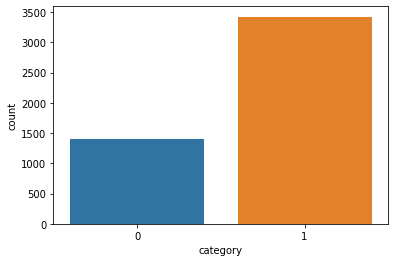

In [3]:
sns.countplot(x='category', data=df)

# Basic classificators

In [4]:
X, y = get_features(df)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.2)

In [6]:
num_trees = 100
models = []
names = []
models.append(('LR', LogisticRegression(random_state=SEED)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=SEED)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=SEED)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=SEED)))

In [7]:
scoring='accuracy'
accuracy = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=SEED)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    accuracy.append(cv_results)
    names.append(name)
    print(f'{name}: mean cv: {cv_results.mean()} std: {cv_results.std()}')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR: mean cv: 0.7323659242312093 std: 0.015188488297568041
LDA: mean cv: 0.7855319292106857 std: 0.0194750156528222


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: mean cv: 0.7225166543301259 std: 0.026443191456346132


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: mean cv: 0.8026371038288136 std: 0.021910268862843932


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: mean cv: 0.855289011506628 std: 0.019314780746907848
NB: mean cv: 0.6828470493237333 std: 0.020618037512973413


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: mean cv: 0.7160251665433013 std: 0.015401105422804012


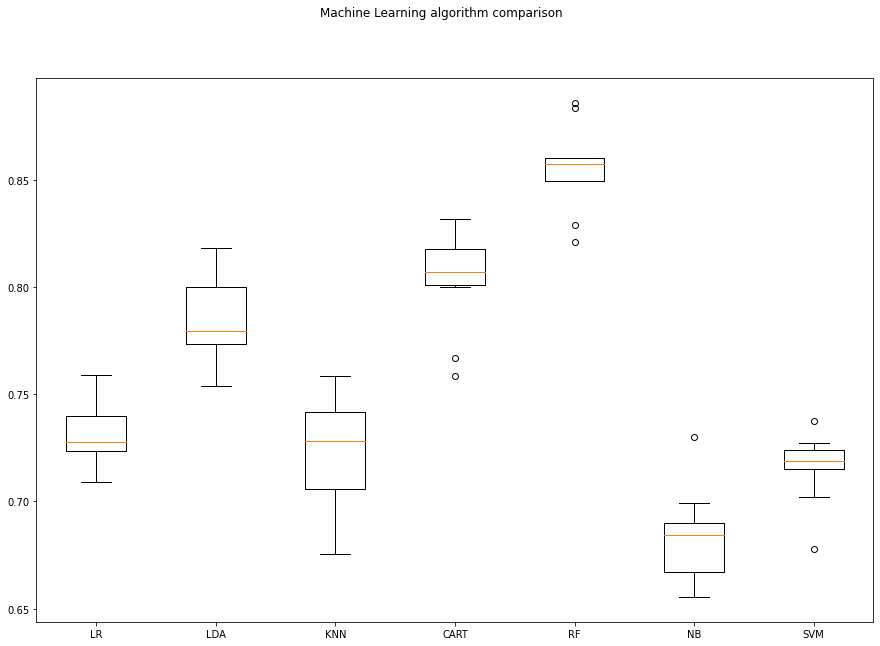

In [9]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot()
plt.boxplot(accuracy)
ax.set_xticklabels(names)
plt.show()

## Testing the best - RandomForest

In [10]:
clf = RandomForestClassifier(n_estimators=num_trees, random_state=SEED)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
rf_predictions = clf.predict(X_test)

In [12]:
print(f'''
Random Forest metrics:
      Accuracy: \t{accuracy_score(y_test, rf_predictions)}
      Precision: \t{precision_score(y_test, rf_predictions)}
      Recall: \t\t{recall_score(y_test, rf_predictions)}
      ''')


Random Forest metrics:
      Accuracy: 	0.8694300518134715
      Precision: 	0.864314789687924
      Recall: 		0.9607843137254902
      


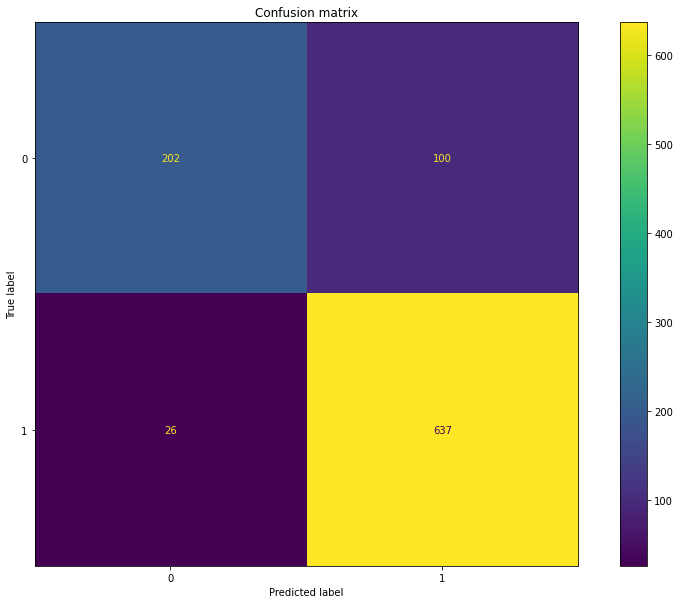

In [13]:
cm_fig = plt.figure(figsize=(15,10))
ax_cm_fig = cm_fig.add_subplot()
plot_confusion_matrix(clf, X_test, y_test, ax=ax_cm_fig)
ax_cm_fig.set_title('Confusion matrix')
plt.show()

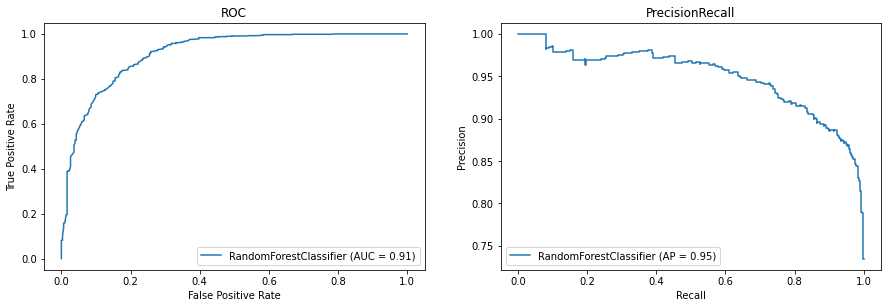

In [14]:
roc_pr_fig = plt.figure(figsize=(15,10))
ax_roc_fig = roc_pr_fig.add_subplot(221)
ax_roc_fig.set_title('ROC')
plot_roc_curve(clf, X_test, y_test, ax=ax_roc_fig)

ax_pr_fig = roc_pr_fig.add_subplot(222)
ax_pr_fig.set_title('PrecisionRecall')
plot_precision_recall_curve(clf, X_test, y_test, ax=ax_pr_fig)

plt.show()

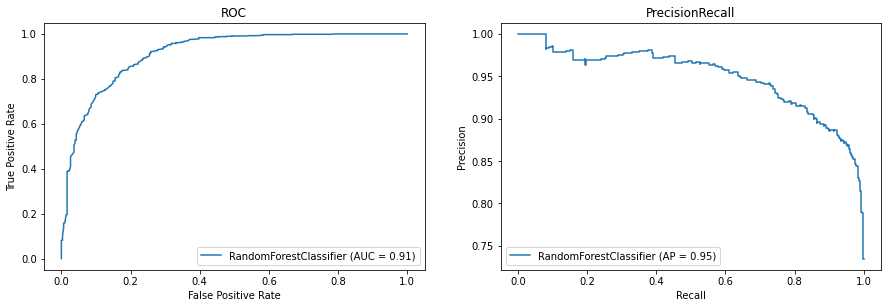

In [15]:
roc_pr_fig = plt.figure(figsize=(15,10))
ax_roc_fig = roc_pr_fig.add_subplot(221)
ax_roc_fig.set_title('ROC')
plot_roc_curve(clf, X_test, y_test, ax=ax_roc_fig)

ax_pr_fig = roc_pr_fig.add_subplot(222)
ax_pr_fig.set_title('PrecisionRecall')
plot_precision_recall_curve(clf, X_test, y_test, ax=ax_pr_fig)

plt.show()

## Testing the best - RandomForest

In [16]:
clf = RandomForestClassifier(n_estimators=num_trees, random_state=SEED)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
rf_predictions = clf.predict(X_test)

In [18]:
print(f'''
Random Forest metrics:
      Accuracy: \t{accuracy_score(y_test, rf_predictions)}
      Precision: \t{precision_score(y_test, rf_predictions)}
      Recall: \t\t{recall_score(y_test, rf_predictions)}
      ''')


Random Forest metrics:
      Accuracy: 	0.8694300518134715
      Precision: 	0.864314789687924
      Recall: 		0.9607843137254902
      


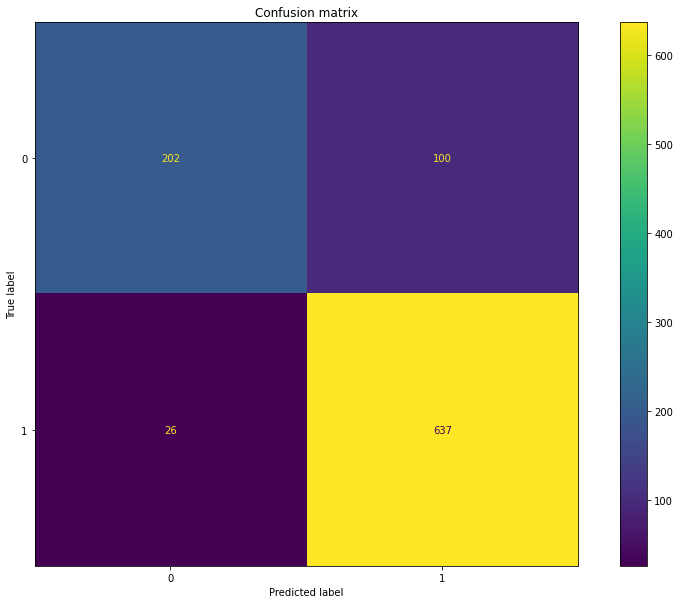

In [19]:
cm_fig = plt.figure(figsize=(15,10))
ax_cm_fig = cm_fig.add_subplot()
plot_confusion_matrix(clf, X_test, y_test, ax=ax_cm_fig)
ax_cm_fig.set_title('Confusion matrix')
plt.show()

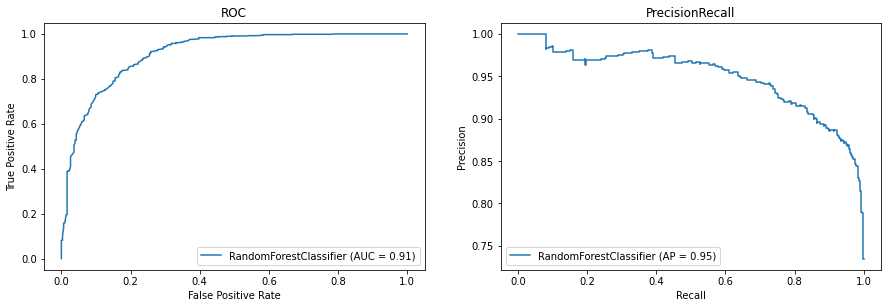

In [20]:
roc_pr_fig = plt.figure(figsize=(15,10))
ax_roc_fig = roc_pr_fig.add_subplot(221)
ax_roc_fig.set_title('ROC')
plot_roc_curve(clf, X_test, y_test, ax=ax_roc_fig)

ax_pr_fig = roc_pr_fig.add_subplot(222)
ax_pr_fig.set_title('PrecisionRecall')
plot_precision_recall_curve(clf, X_test, y_test, ax=ax_pr_fig)

plt.show()

## VGG16

In [21]:
X = []
y = []
for _, data in df.iterrows():
    img = cv2.imread(data.filename)
    X.append(img)
    y.append(data.category)
X = np.array(X)
y = np.array(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.2)

In [23]:
vgg16 = VGG16CNN(image_size=X_train[0].shape, batch_size = 10, nb_epochs = 1)

In [24]:
vgg16.model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 253, 337, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 251, 335, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 253, 337, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 251, 335, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 167, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 127, 169, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 167, 128)     7

In [26]:
vgg16.train_model(X_train, y_train)

 24/386 [>.............................] - ETA: 16:01:26 - loss: 1457.4061 - accuracy: 0.5629

KeyboardInterrupt: 

In [ ]:
vgg16.save_model()